[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://bit.ly/open-data-03-franchise-input)

## 소상공인시장진흥공단 상가업소정보로 프랜차이즈 입점분석

* 배스킨라빈스와 던킨도너츠는 근처에 입지한 것을 종종 볼 수 있었어요.
* 또, 파리바게뜨와 뚜레주르는 주변에서 많이 볼 수 있는 프랜차이즈 중 하나에요. 
* 이런 프랜차이즈 매장이 얼마나 모여 있는지 혹은 흩어져 있는지 지도에 직접 표시를 해보면서 대용량 데이터에서 원하는 특정 데이터를 추출해 보는 실습을 해봅니다.
* 추출한 데이터를 전처리하고 가공해서 원하는 형태로 시각화를 하거나 지도에 표현합니다.
* Python, Pandas, Numpy, Seaborn, Matplotlib, folium 을 통해 다양한 방법으로 표현하면서 파이썬의 여러 도구들에 익숙해 지는 것을 목표로 합니다.

### 다루는 내용
* 데이터 요약하기
* 공공데이터를 활용해 텍스트 데이터 정제하고 원하는 정보 찾아내기
* 문자열에서 원하는 텍스트 추출하기
* 문자열을 활용한 다양한 분석 방법과 위치 정보 사용하기
* folium을 통한 위경도 데이터 시각화 이해하기
* folium을 통해 지도에 분석한 내용을 표현하기 - CircleMarker와 MarkerCluster 그리기


### 데이터셋
* 공공데이터 포털 : https://www.data.go.kr/dataset/15012005/fileData.do
* 영상에 사용한 데이터셋 : http://bit.ly/open-data-set-folder (공공데이터포털에서 다운로드 받은 파일이 있습니다. 어떤 파일을 다운로드 받아야 될지 모르겠다면 여기에 있는 파일을 사용해 주세요.)

## 필요한 라이브러리 불러오기

In [ ]:
# pandas, numpy, seaborn을 불러옵니다.

# 구버전의 주피터 노트북에서 그래프가 보이는 설정
%matplotlib inline

## 시각화를 위한 한글 폰트 설정하기

In [8]:
# 한글폰트 오류 해결
plt.rc("font", family = "AppleGothic")
# 마이너스 오류 해결
plt.rc("axes",unicode_minus = False)
# 그래프 선명하게
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")


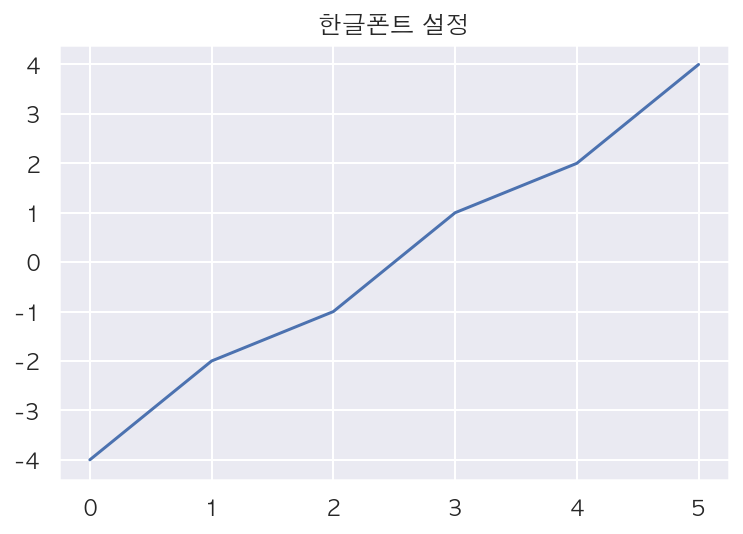

In [12]:
# 한글폰트와 마이너스 폰트 설정 확인
plt.title("한글폰트 설정")
plt.plot([-4,-2,-1,1,2,4])


## Google Colab 을 위한 코드
### Colab 에서 실행을 위한 코드

* 아래의 코드는 google colaboratory 에서 실행을 위한 코드로 로컬 아나콘다에서는 주석처리합니다.
* google colaboratory 에서는 주석을 풀고 폰트 설정과 csv 파일을 불러옵니다.

In [ ]:
# # 나눔고딕 설치
# !apt -qq -y install fonts-nanum > /dev/null

# import matplotlib.font_manager as fm

# fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font = fm.FontProperties(fname=fontpath, size=9)
# fm._rebuild()

# # 그래프에 retina display 적용
# %config InlineBackend.figure_format = 'retina'

# # Colab 의 한글 폰트 설정
# plt.rc('font', family='NanumBarunGothic') 

### Colab 용 GoogleAuth 인증 
* 구글 드라이브에 있는 파일을 가져오기 위해 사용합니다.

In [ ]:
# # 구글 드라이브에서 csv 파일을 읽어오기 위해 gauth 인증
# !pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

# # PyDrive client 인증
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

In [ ]:
# # 공유 가능한 링크로 파일 가져오기
# url = 'https://drive.google.com/open?id=1e91PH_KRFxNXUsx8Hi-Q2vPiorCDsOP4'
# id = url.split('=')[1]
# print(id)
# downloaded = drive.CreateFile({'id':id}) 
# # data 폴더에 파일을 관리하며, 폴더가 없다면 만들어서 파일을 관리하도록 한다.
# %mkdir data
# downloaded.GetContentFile('data/상가업소정보_201912_01.csv')  

## 데이터 불러오기
* 공공데이터 포털 : https://www.data.go.kr/dataset/15012005/fileData.do
* 공공데이터 포털에서 소상공인시장진흥공단 상가업소정보를 다운로드 받아 사용했습니다
* 영상에 사용한 데이터셋 : http://bit.ly/open-data-set-folder (공공데이터포털에서 다운로드 받은 파일이 있습니다. 어떤 파일을 다운로드 받아야 될지 모르겠다면 여기에 있는 파일을 사용해 주세요.)

In [15]:
# 파일을 불러와 df 라는 변수에 담습니다.
df = pd.read_csv("data/상가업소정보_201912_01.csv", sep = "|")

(573680, 39)

In [18]:
df.tail(1)

상가업소번호     상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
573679  16335150  마이리틀네일  NaN         F    생활서비스       F01  이/미용/건강    F01A02   

       상권업종소분류명 표준산업분류코드  ...                     건물관리번호      건물명  \
573679   발/네일케어   S96119  ...  1132010700108120000018489  현대타운아파트   

                         도로명주소   구우편번호   신우편번호  동정보  층정보  호정보          경도  \
573679  서울특별시 도봉구 도봉로114길 22-8  132691  1455.0  101  NaN  NaN  127.035145   

               위도  
573679  37.647099  

[1 rows x 39 columns]

### 데이터 크기 보기

In [16]:
# shape 를 통해 불러온 csv 파일의 크기를 확인합니다.
df.shape

(573680, 39)

### info 보기

In [20]:
# info 를 사용하면 데이터의 전체적인 정보를 볼 수 있습니다.
# 데이터의 사이즈, 타입, 메모리 사용량 등을 볼 수 있습니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   지점명        76674 non-null   object 
 3   상권업종대분류코드  573680 non-null  object 
 4   상권업종대분류명   573680 non-null  object 
 5   상권업종중분류코드  573680 non-null  object 
 6   상권업종중분류명   573680 non-null  object 
 7   상권업종소분류코드  573680 non-null  object 
 8   상권업종소분류명   573680 non-null  object 
 9   표준산업분류코드   539290 non-null  object 
 10  표준산업분류명    539290 non-null  object 
 11  시도코드       573680 non-null  int64  
 12  시도명        573680 non-null  object 
 13  시군구코드      573680 non-null  int64  
 14  시군구명       573680 non-null  object 
 15  행정동코드      573680 non-null  int64  
 16  행정동명       573680 non-null  object 
 17  법정동코드      573680 non-null  int64  
 18  법정동명       573680 non-null  object 
 19  지번코드       573680 non-n

### 결측치 보기

<AxesSubplot:>

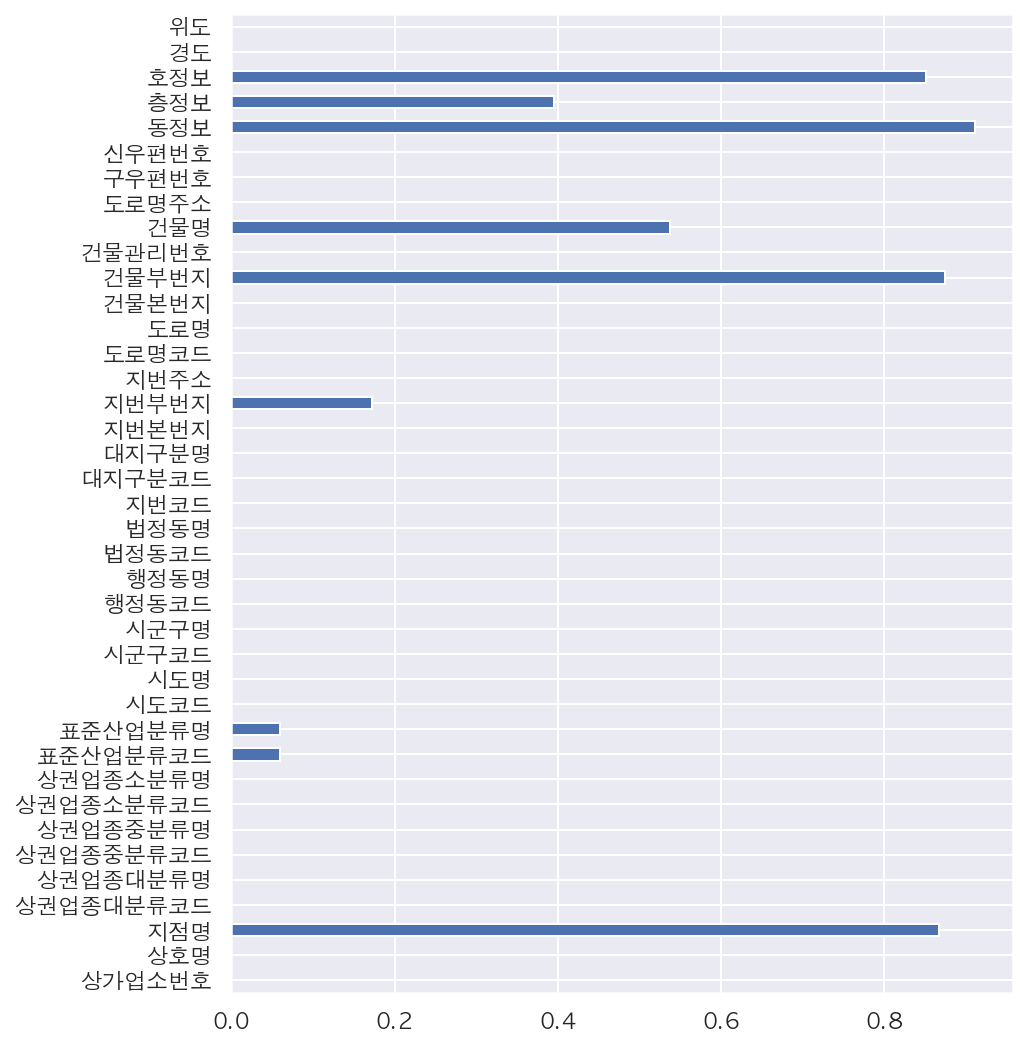

In [25]:
# isnull() 을 사용하면 데이터의 결측치를 볼 수 있습니다.
# 결측치는 True로 값이 있다면 False로 표시되는데 True 는 1과 같기 때문에 
# True 값을 sum()을 사용해서 더하게 되면 합계를 볼 수 있습니다.
# mean()을 사용하면 결측치의 비율을 볼 수 있습니다.

df.isnull().mean().plot.barh(figsize = (7,9))

### 사용하지 않는 컬럼 제거하기

In [31]:
# drop을 하는 방법도 있지만 사용할 컬럼만 따로 모아서 보는 방법도 있습니다.
# 여기에서는 사용할 컬럼만 따로 모아서 사용합니다.
df.columns
columns = [
    '상호명',
    '상권업종대분류명',
    '상권업종중분류명',
    '상권업종소분류명',
    "시도명",
    "시군구명",
    "행정동명",
    "법정동명",
    "도로명주소",
    "경도",
    "위도",
]
print(df.shape)
df = df[columns].copy()
df.shape

(573680, 39)


(573680, 11)

In [32]:
# 제거 후 메모리 사용량 보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       573679 non-null  object 
 1   상권업종대분류명  573680 non-null  object 
 2   상권업종중분류명  573680 non-null  object 
 3   상권업종소분류명  573680 non-null  object 
 4   시도명       573680 non-null  object 
 5   시군구명      573680 non-null  object 
 6   행정동명      573680 non-null  object 
 7   법정동명      573680 non-null  object 
 8   도로명주소     573680 non-null  object 
 9   경도        573680 non-null  float64
 10  위도        573680 non-null  float64
dtypes: float64(2), object(9)
memory usage: 48.1+ MB


## 색인으로 서브셋 가져오기
### 서울만 따로 보기

In [38]:
# 시도명이 서울로 시작하는 데이터만 봅니다.
# 또, df_seoul 이라는 변수에 결과를 저장합니다.
# 새로운 변수에 데이터프레임을 할당할 때 copy()를 사용하는 것을 권장합니다.
df_seoul = df[df["시도명"] == "서울특별시"].copy()
df_seoul.shape

(407376, 11)

In [39]:
# unique 를 사용하면 중복을 제거한 시군구명을 가져옵니다. 
# 그리고 shape로 갯수를 출력해 봅니다.
df_seoul["시군구명"].unique()

array(['강남구', '금천구', '송파구', '광진구', '강서구', '중구', '서초구', '성북구', '구로구',
       '영등포구', '서대문구', '동대문구', '노원구', '동작구', '성동구', '관악구', '강동구', '양천구',
       '종로구', '강북구', '은평구', '중랑구', '도봉구', '마포구', '용산구'], dtype=object)

In [42]:
# nunique 를 사용하면 중복을 제거한 시군구명의 갯수를 세어줍니다.
df_seoul["시군구명"].nunique()

25

## 파일로 저장하기
* 전처리한 파일을 저장해 두면 재사용을 할 수 있습니다.
* 재사용을 위해 파일로 저장합니다.

In [45]:
# "seoul_open_store.csv" 라는 이름으로 저장합니다.
df_seoul.to_csv("seoul_open_store.csv", index = False)

In [46]:
# 제대로 저장이 되었는지 같은 파일을 불러와서 확인합니다.
pd.read_csv("seoul_open_store.csv").tail()

상호명  상권업종대분류명      상권업종중분류명   상권업종소분류명    시도명  시군구명    행정동명  \
407371   비파티세리공덕        음식            한식  한식/백반/한정식  서울특별시   마포구     공덕동   
407372     앤탑PC방  관광/여가/오락  PC/오락/당구/볼링등     인터넷PC방  서울특별시   성동구  성수2가3동   
407373  오즈아레나PC방  관광/여가/오락  PC/오락/당구/볼링등     인터넷PC방  서울특별시   강남구    논현1동   
407374    파인트리네일     생활서비스       이/미용/건강     발/네일케어  서울특별시  영등포구     여의동   
407375    마이리틀네일     생활서비스       이/미용/건강     발/네일케어  서울특별시   도봉구     창1동   

         법정동명                   도로명주소          경도         위도  
407371    공덕동     서울특별시 마포구 마포대로14길 4  126.955059  37.548618  
407372  성수동2가     서울특별시 성동구 성수일로8길 37  127.054615  37.545853  
407373    논현동      서울특별시 강남구 강남대로 492  127.024102  37.506202  
407374   여의도동     서울특별시 영등포구 국제금융로 10  126.924863  37.525172  
407375     창동  서울특별시 도봉구 도봉로114길 22-8  127.035145  37.647099

## 배스킨라빈스, 던킨도너츠 위치 분석

### 특정 상호만 가져오기
* 여기에서는 배스킨라빈스와 던킨도너츠 상호를 가져와서 실습합니다.
* 위에서 pandas의 str.conatains를 활용해 봅니다.
* https://pandas.pydata.org/docs/user_guide/text.html#testing-for-strings-that-match-or-contain-a-pattern

* 상호명에서 브랜드명을 추출합니다.
* 대소문자가 섞여 있을 수도 있기 때문에 대소문자를 변환해 줍니다.
* 오타를 방지하기 위해 배스킨라빈스의 영문명은 baskinrobbins, 던킨도너츠는 dunkindonuts 입니다.

In [49]:
# 문자열의 소문자로 변경하는 메소드를 사용합니다.
# "상호명_소문자" 컬럼을 만듭니다.
df_seoul["상호명_소문자"] = df_seoul["상호명"].str.lower()
df_seoul.tail()

상호명  상권업종대분류명      상권업종중분류명   상권업종소분류명    시도명  시군구명    행정동명  \
573675   비파티세리공덕        음식            한식  한식/백반/한정식  서울특별시   마포구     공덕동   
573676     앤탑PC방  관광/여가/오락  PC/오락/당구/볼링등     인터넷PC방  서울특별시   성동구  성수2가3동   
573677  오즈아레나PC방  관광/여가/오락  PC/오락/당구/볼링등     인터넷PC방  서울특별시   강남구    논현1동   
573678    파인트리네일     생활서비스       이/미용/건강     발/네일케어  서울특별시  영등포구     여의동   
573679    마이리틀네일     생활서비스       이/미용/건강     발/네일케어  서울특별시   도봉구     창1동   

         법정동명                   도로명주소          경도         위도   상호명_소문자  
573675    공덕동     서울특별시 마포구 마포대로14길 4  126.955059  37.548618   비파티세리공덕  
573676  성수동2가     서울특별시 성동구 성수일로8길 37  127.054615  37.545853     앤탑pc방  
573677    논현동      서울특별시 강남구 강남대로 492  127.024102  37.506202  오즈아레나pc방  
573678   여의도동     서울특별시 영등포구 국제금융로 10  126.924863  37.525172    파인트리네일  
573679     창동  서울특별시 도봉구 도봉로114길 22-8  127.035145  37.647099    마이리틀네일

In [70]:
# baskinrobbins 를 "상호명_소문자" 컬럼으로 가져옵니다.
# 띄어쓰기 등의 다를 수 있기 때문에 앞글자 baskin 만 따서 가져오도록 합니다.
# '상호명_소문자'컬럼으로 '배스킨라빈스|baskin' 를 가져와 갯수를 세어봅니다.
# loc[행]
# loc[행, 열]
df_seoul.loc[df_seoul["상호명_소문자"].str.contains("베스킨라빈스|배스킨라빈스|baskinrobbins"),"상호명_소문자"].shape


(466,)

In [67]:
df_seoul["상호명_소문자"].str.extract("(베|배)스킨라빈스|baskinrobbins")[0].value_counts()


배    347
베    117
Name: 0, dtype: int64

In [72]:
# 상호명에서 던킨도너츠만 가져옵니다.
# 상호명은 소문자로 변경해 준 컬럼을 사용합니다.
# 던킨|dunkin 의 "상호명_소문자"로 갯수를 세어봅니다.

df_seoul.loc[df_seoul["상호명_소문자"].str.contains("던킨|dunkin")]

상호명 상권업종대분류명 상권업종중분류명 상권업종소분류명    시도명  시군구명  행정동명   법정동명  \
1167            던킨도너츠       음식    패스트푸드    도너츠전문  서울특별시  서대문구   신촌동    대현동   
1819      던킨도너츠테크노마트점       음식    패스트푸드    도너츠전문  서울특별시   광진구  구의3동    구의동   
2305       던킨도너츠창동하나로       음식    패스트푸드    도너츠전문  서울특별시   도봉구   창4동     창동   
2342    던킨도너츠용산민자역사2호       음식    패스트푸드    도너츠전문  서울특별시   용산구  한강로동  한강로3가   
3007            던킨도너츠       음식    패스트푸드    도너츠전문  서울특별시   송파구  잠실본동    잠실동   
...               ...      ...      ...      ...    ...   ...   ...    ...   
553907          던킨도너츠       음식    패스트푸드    도너츠전문  서울특별시   서초구  반포3동    잠원동   
554211          던킨도너츠       음식    패스트푸드    도너츠전문  서울특별시  동대문구  휘경2동    휘경동   
558894  DUNKINDOONUTS       음식  제과제빵떡케익      제과점  서울특별시   서초구  서초2동    서초동   
560984          던킨도너츠       음식    패스트푸드    도너츠전문  서울특별시   성동구  행당1동    행당동   
569825          던킨도너츠       음식    패스트푸드    도너츠전문  서울특별시   동작구  사당1동    사당동   

                       도로명주소          경도         위도        상호명_소문자  
1167     서울특별시 서대문구 이화여대길 56  126.945369  37.559263          던킨도너츠  
1819    서울특별시 광진구 광나루로56길 85  127.095681  37.535713    던킨도너츠테크노마트점  
2305     서울특별시 도봉구 마들로11길 20  127.050818  37.655101     던킨도너츠창동하나로  
2342    서울특별시 용산구 한강대로21나길 7  126.963223  37.527903  던킨도너츠용산민자역사2호  
3007     서울특별시 송파구 석촌호수로 118  127.090005  37.507431          던킨도너츠  
...                      ...         ...        ...            ...  
553907   서울특별시 서초구 잠원로 37-48  127.006169  37.510071          던킨도너츠  
554211     서울특별시 동대문구 망우로 82  127.063537  37.586201          던킨도너츠  
558894    서울특별시 서초구 강남대로 373  127.027989  37.495971  dunkindoonuts  
560984   서울특별시 성동구 왕십리광장로 17  127.038379  37.561436          던킨도너츠  
569825   서울특별시 동작구 동작대로 43-2  126.981595  37.480505          던킨도너츠  

[191 rows x 12 columns]

In [77]:
# '상호명_소문자'컬럼으로  '배스킨|베스킨|baskin|던킨|dunkin'를 가져와 df_31 변수에 담습니다.
df_31 = df_seoul.loc[df_seoul["상호명_소문자"]
                     .str.contains("배스킨라빈스|베스킨라빈스|baskinrobbins|던킨|dunkin")].copy()
df_31.shape

(657, 12)

In [85]:
# ~은 not을 의미합니다. 베스킨라빈스가 아닌 데이터를 찾을 때 사용하면 좋습니다.
# 아래 코드처럼 결측치를 던킨도너츠로 채워줘도 괜찮습니다.


df_31.loc[df_31["상호명_소문자"].str.contains("배스킨라빈스|베스킨라빈스|baskinrobbins"),"브랜드명"] = "배스킨라빈스"

df_31[["상호명","브랜드명"]]

상호명    브랜드명
76             배스킨라빈스  배스킨라빈스
1167            던킨도너츠     NaN
1819      던킨도너츠테크노마트점     NaN
2164           베스킨라빈스  배스킨라빈스
2305       던킨도너츠창동하나로     NaN
...               ...     ...
558894  DUNKINDOONUTS     NaN
560984          던킨도너츠     NaN
561929       배스킨라빈스31  배스킨라빈스
561930       배스킨라빈스31  배스킨라빈스
569825          던킨도너츠     NaN

[657 rows x 2 columns]

In [86]:
# 'df_31에 담긴 상호명','브랜드명'으로 미리보기를 합니다.
# df_31.loc[~df_31["상호명_소문자"].str.contains("배스킨라빈스|베스킨라빈스|baskinrobbins"), 
#           "브랜드명"]
# df_31.loc[~df_31["상호명_소문자"].str.contains("배스킨라빈스|베스킨라빈스|baskinrobbins"),"브랜드명"] = "던킨도너츠"
df_31["브랜드명"] = df_31["브랜드명"].fillna("던킨도너츠")
df_31["브랜드명"]


76        배스킨라빈스
1167       던킨도너츠
1819       던킨도너츠
2164      배스킨라빈스
2305       던킨도너츠
           ...  
558894     던킨도너츠
560984     던킨도너츠
561929    배스킨라빈스
561930    배스킨라빈스
569825     던킨도너츠
Name: 브랜드명, Length: 657, dtype: object

In [87]:
# 데이터가 제대로 모아졌는지 확인합니다.
# "상권업종대분류명"을  value_counts 를 통해 빈도수를 계산합니다.

df_31["상권업종대분류명"].value_counts()

음식       655
생활서비스      1
소매         1
Name: 상권업종대분류명, dtype: int64

In [88]:
# "상권업종대분류명"컬럼에서 isin 기능을 사용해서 "소매", "생활서비스" 인 데이터만 가져옵니다.

df_31[df_31["상권업종대분류명"].isin(["소매","생활서비스"])]

상호명 상권업종대분류명 상권업종중분류명 상권업종소분류명    시도명 시군구명  행정동명 법정동명  \
358699         배스킨라빈스       소매    종합소매점      할인점  서울특별시  강남구  압구정동  신사동   
556592  baskinrobbins    생활서비스    광고/인쇄     인쇄종합  서울특별시  강남구  역삼1동  역삼동   

                     도로명주소          경도         위도        상호명_소문자    브랜드명  
358699  서울특별시 강남구 압구정로 204  127.029381  37.527375         배스킨라빈스  배스킨라빈스  
556592  서울특별시 강남구 강남대로 396  127.028289  37.498154  baskinrobbins  배스킨라빈스

In [91]:
# "상권업종대분류명"에서 "소매", "생활서비스"는 제외합니다.
df_31 = df_31[~df_31["상권업종대분류명"].isin(["소매","생활서비스"])].copy()
df_31.shape

(655, 13)

### 범주형 값으로 countplot 그리기

In [99]:
# value_counts 로 "브랜드명"의 빈도수를 구합니다.
brand_count = df_31 ["브랜드명"].value_counts()
brand_count

배스킨라빈스    464
던킨도너츠     191
Name: 브랜드명, dtype: int64

<AxesSubplot:>

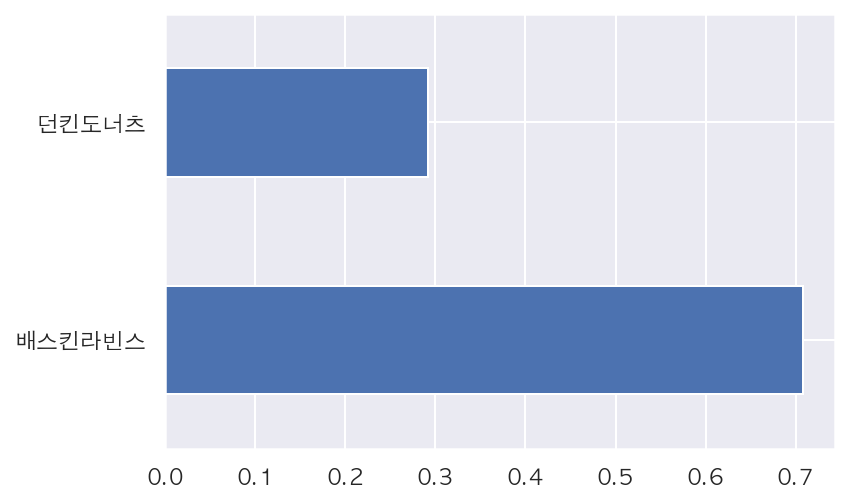

In [97]:
# normalize=True 로 빈도수의 비율을 구합니다.
df_31 ["브랜드명"].value_counts(normalize = True).plot.barh()

In [ ]:
enumerate(brand_count.index)

In [111]:
list(enumerate(brand_count.index))

[(0, '배스킨라빈스'), (1, '던킨도너츠')]

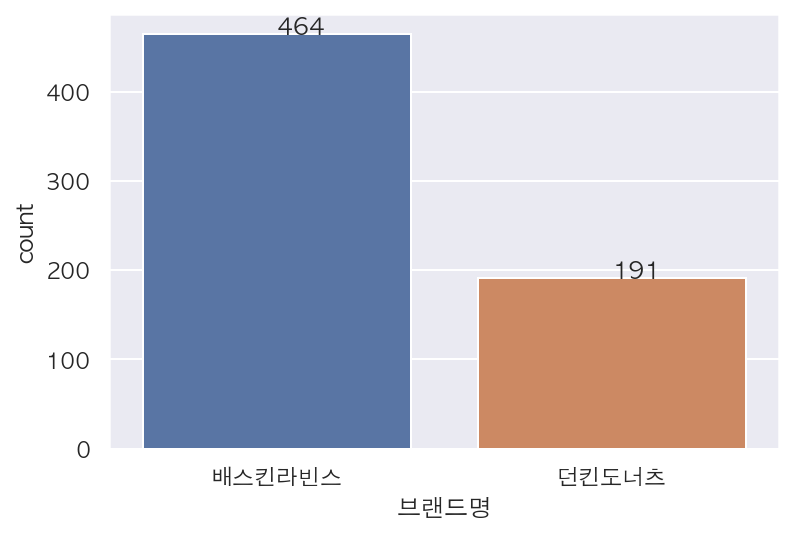

In [115]:
# countplot 을 그립니다.
g = sns.countplot(data = df_31, x = "브랜드명")

for i, var in enumerate(brand_count.index):
    g.text(x = i, y = brand_count[i], s = brand_count[i])



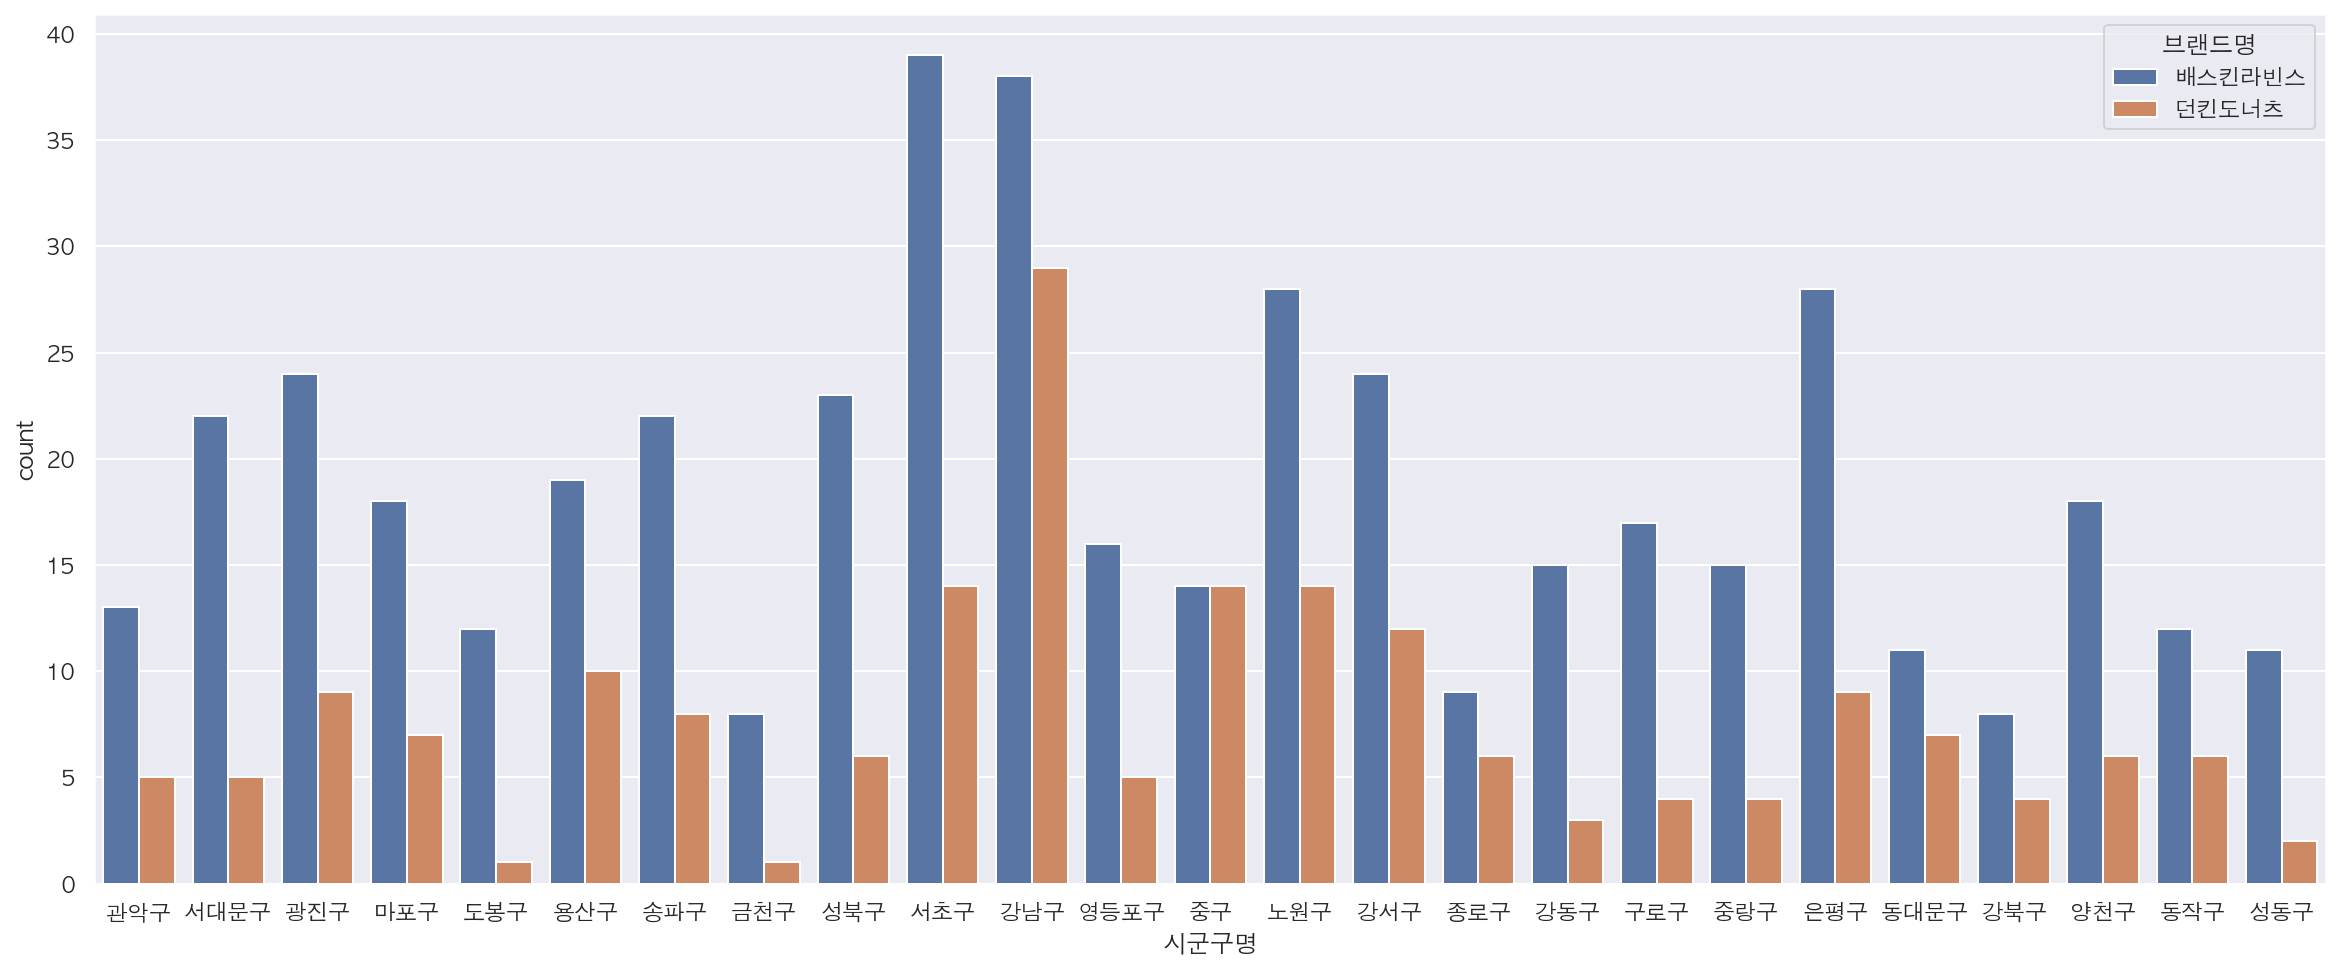

In [120]:
# 시군구명으로 빈도수를 세고 브랜드명으로 색상을 다르게 표현하는 countplot 을 그립니다.
plt.figure(figsize = (20,8))
g = sns.countplot(data = df_31, x = "시군구명", hue = "브랜드명")


### scatterplot 그리기

* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#scatter-plot

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='경도', ylabel='위도'>

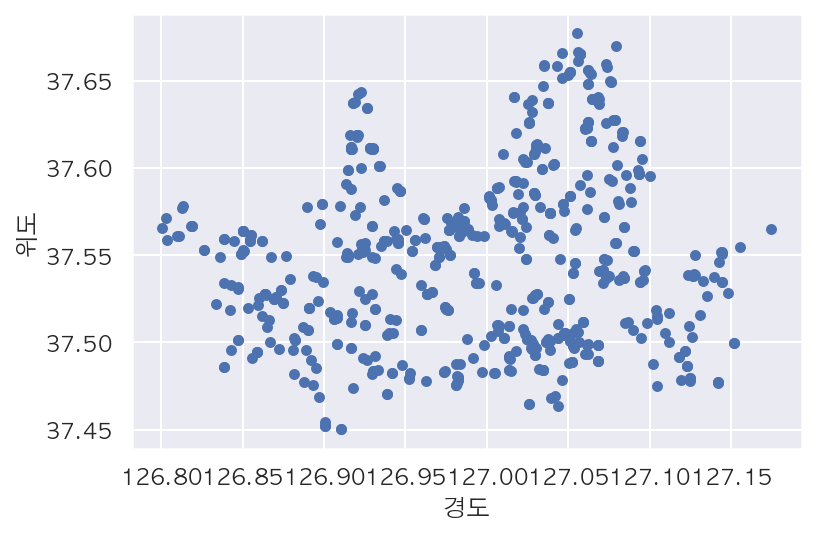

In [121]:
# Pandas 의 plot 으로 scatterplot 을 그립니다.
df_31[["위도","경도"]].plot.scatter(x = "경도",y = "위도")

<AxesSubplot:xlabel='경도', ylabel='위도'>

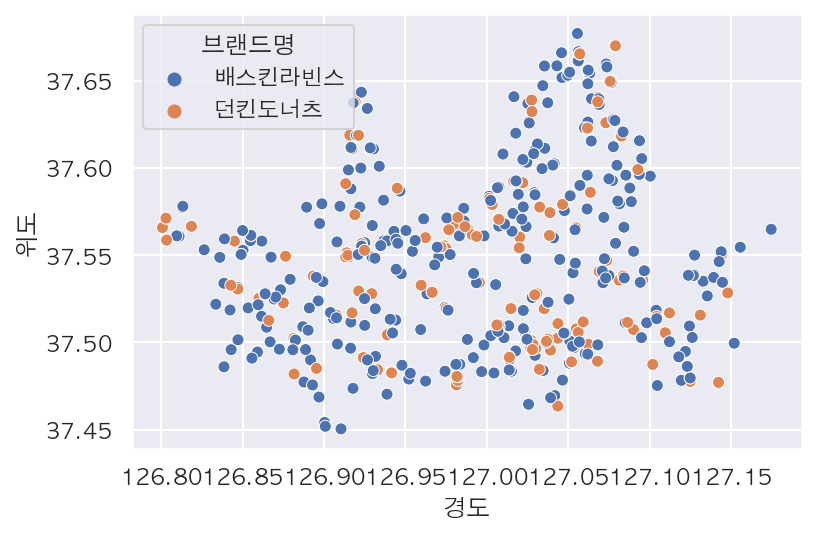

In [122]:
# seaborn의 scatterplot 으로 hue에 브랜드명을 지정해서 시각화 합니다.
sns.scatterplot(data = df_31, x = "경도", y = "위도", hue = "브랜드명")

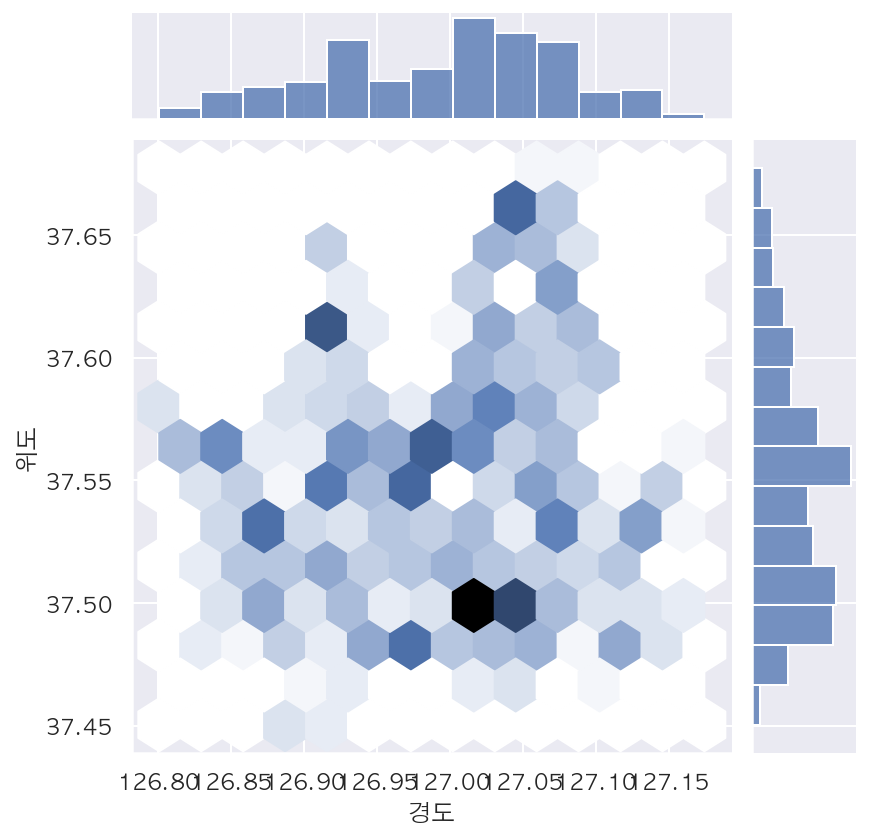

In [124]:
# 위에서 그렸던 그래프를 jointplot 으로 kind="hex" 을 사용해 그려봅니다.
sns.jointplot(data = df_31, x = "경도", y = "위도", kind = "hex")

## Folium 으로 지도 활용하기
* 다음의 프롬프트 창을 열어 conda 명령어로 설치합니다.
<img src="https://i.imgur.com/x7pzfCP.jpg">
* <font color="red">주피터 노트북 상에서 설치가 되지 않으니</font> anaconda prompt 를 열어서 설치해 주세요.


* 윈도우
    * <font color="red">관리자 권한</font>으로 아나콘다를 설치하셨다면 다음의 방법으로 anaconda prompt 를 열어 주세요.
    <img src="https://i.imgur.com/GhoLwsd.png">
* 맥
    * terminal 프로그램을 열어 설치해 주세요. 


* 다음의 문서를 활용해서 지도를 표현합니다.
* https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/Quickstart.ipynb
* Folium 사용예제 :
http://nbviewer.jupyter.org/github/python-visualization/folium/tree/master/examples/

In [125]:
# 아나콘다에서 folium 을 사용하기 위해서는 별도의 설치가 필요
# https://anaconda.org/conda-forge/folium
# conda install -c conda-forge folium 
# 지도 시각화를 위한 라이브러리
import folium

In [127]:
# 지도의 중심을 지정하기 위해 위도와 경도의 평균을 구합니다. 
lat = df_31["위도"].mean()
long = df_31["경도"].mean()
lat, long

(37.548567678569086, 126.99419527148791)

In [168]:
df_31

상호명 상권업종대분류명 상권업종중분류명 상권업종소분류명    시도명  시군구명  행정동명 법정동명  \
76             배스킨라빈스       음식    패스트푸드  아이스크림판매  서울특별시   관악구   청룡동  봉천동   
1167            던킨도너츠       음식    패스트푸드    도너츠전문  서울특별시  서대문구   신촌동  대현동   
1819      던킨도너츠테크노마트점       음식    패스트푸드    도너츠전문  서울특별시   광진구  구의3동  구의동   
2164           베스킨라빈스       음식    패스트푸드  아이스크림판매  서울특별시   마포구   서교동  서교동   
2305       던킨도너츠창동하나로       음식    패스트푸드    도너츠전문  서울특별시   도봉구   창4동   창동   
...               ...      ...      ...      ...    ...   ...   ...  ...   
558894  DUNKINDOONUTS       음식  제과제빵떡케익      제과점  서울특별시   서초구  서초2동  서초동   
560984          던킨도너츠       음식    패스트푸드    도너츠전문  서울특별시   성동구  행당1동  행당동   
561929       배스킨라빈스31       음식    패스트푸드  아이스크림판매  서울특별시   송파구  문정2동  문정동   
561930       배스킨라빈스31       음식    패스트푸드  아이스크림판매  서울특별시   강동구   강일동  강일동   
569825          던킨도너츠       음식    패스트푸드    도너츠전문  서울특별시   동작구  사당1동  사당동   

                       도로명주소          경도         위도        상호명_소문자    브랜드명  
76         서울특별시 관악구 관악로 161  126.952166  37.479599         배스킨라빈스  배스킨라빈스  
1167     서울특별시 서대문구 이화여대길 56  126.945369  37.559263          던킨도너츠   던킨도너츠  
1819    서울특별시 광진구 광나루로56길 85  127.095681  37.535713    던킨도너츠테크노마트점   던킨도너츠  
2164       서울특별시 마포구 와우산로 88  126.923809  37.552104         베스킨라빈스  배스킨라빈스  
2305     서울특별시 도봉구 마들로11길 20  127.050818  37.655101     던킨도너츠창동하나로   던킨도너츠  
...                      ...         ...        ...            ...     ...  
558894    서울특별시 서초구 강남대로 373  127.027989  37.495971  dunkindoonuts   던킨도너츠  
560984   서울특별시 성동구 왕십리광장로 17  127.038379  37.561436          던킨도너츠   던킨도너츠  
561929    서울특별시 송파구 송파대로 111  127.124872  37.479617       배스킨라빈스31  배스킨라빈스  
561930    서울특별시 강동구 아리수로 427  127.174586  37.564954       배스킨라빈스31  배스킨라빈스  
569825   서울특별시 동작구 동작대로 43-2  126.981595  37.480505          던킨도너츠   던킨도너츠  

[655 rows x 13 columns]

In [166]:
range(len(df_31[["위도", "경도", "상호명"]].values))

range(0, 655)

In [160]:
df_31[["위도","경도", "상호명"]].values[0][0]

37.4795992772291

In [200]:
# 샘플을 하나 추출해서 지도에 표시해 봅니다.

m = folium.Map([lat, long], zoom_start = 11)

for i in df_31.index[:100]:
    if df_31.loc[i,"브랜드명"] == "던킨도너츠":
        folium.Marker(
            [df_31.loc[i,"위도"],df_31.loc[i,"경도"]],
            tooltip = df_31.loc[i,"상호명"]+" "+df_31.loc[i,"도로명주소"],
            icon = folium.Icon(color = "green"),
        ).add_to(m)
    else:
        folium.Marker(
            [df_31.loc[i,"위도"],df_31.loc[i,"경도"]],
            tooltip = df_31.loc[i,"상호명"]+" "+df_31.loc[i,"도로명주소"],
            icon = folium.Icon(color = "blue"),
            popup = df_31.loc[i,"도로명주소"]
        ).add_to(m)
m

In [177]:
# folium 사용법을 보고 일부 데이터를 출력해 봅니다.
df_31.loc[76,"위도"]

37.4795992772291

In [ ]:
# html 파일로 저장하기
# tooltip 의 한글이 깨져보인다면 html 파일로 저장해서 보세요.


### 서울의 배스킨라빈스와 던킨도너츠 매장 분포
* 배스킨라빈스와 던킨도너츠 매장을 지도에 표현합니다.

In [ ]:
# 데이터프레임의 인덱스만 출력합니다.


### 기본 마커로 표현하기

In [ ]:
# icon=folium.Icon(color=icon_color) 로 아이콘 컬러를 변경합니다.


### MarkerCluster 로 표현하기
* https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/MarkerCluster.ipynb

In [201]:
# icon=folium.Icon(color=icon_color) 로 아이콘 컬러를 변경합니다.
from folium.plugins import MarkerCluster

In [203]:
m = folium.Map([lat, long], zoom_start = 11)
marker_cluster = MarkerCluster().add_to(m)  

for i in df_31.index:
    if df_31.loc[i,"브랜드명"] == "던킨도너츠":
        folium.Marker(
            [df_31.loc[i,"위도"],df_31.loc[i,"경도"]],
            tooltip = df_31.loc[i,"상호명"]+" "+df_31.loc[i,"도로명주소"],
            icon = folium.Icon(color = "green"),
        ).add_to(marker_cluster)
    else:
        folium.Marker(
            [df_31.loc[i,"위도"],df_31.loc[i,"경도"]],
            tooltip = df_31.loc[i,"상호명"]+" "+df_31.loc[i,"도로명주소"],
            icon = folium.Icon(color = "blue"),
            popup = df_31.loc[i,"도로명주소"]
        ).add_to(marker_cluster)
m

## 파리바게뜨와 뚜레주르 분석하기

### 데이터 색인으로 가져오기

In [237]:
# 상호명 소문자로 정리 복습
df_seoul["상호명_소문자"] =  df_seoul["상호명"].str.lower()
df_bread = df_seoul.loc[df_seoul["상호명_소문자"].str.contains("뚜레주르|뚜레쥬르|파리바게|빠리바게|파리크라|빠리크라")].copy()
df_bread = df_bread[~(df_bread["상권업종대분류명"] == "학문/교육")]
df_bread["상호명_소문자"].unique()

df_bread.loc[df_bread["상호명_소문자"].str.contains("뚜레주르|뚜레쥬르"), "브랜드명"] = "뚜레주르"
df_bread.loc[df_bread["상호명_소문자"].str.contains("파리바게|빠리바게"), "브랜드명"] = "파리바게트"
df_bread.loc[df_bread["상호명_소문자"].str.contains("파리크라|빠리크라"), "브랜드명"] = "파리크라상"


상호명 상권업종대분류명 상권업종중분류명 상권업종소분류명    시도명  시군구명  행정동명 법정동명  \
559820  파리바게뜨       음식  제과제빵떡케익      제과점  서울특별시   송파구   위례동  장지동   
561538  파리바게뜨       음식  제과제빵떡케익      제과점  서울특별시   강서구  방화1동  마곡동   
561810  파리바게뜨       음식  제과제빵떡케익      제과점  서울특별시   관악구   청룡동  봉천동   
569327  파리바게뜨       음식  제과제빵떡케익      제과점  서울특별시   마포구   상암동  상암동   
569479  파리바게뜨       음식  제과제빵떡케익      제과점  서울특별시  동대문구  휘경2동  휘경동   

                         도로명주소          경도         위도 상호명_소문자   브랜드명  
559820     서울특별시 송파구 위례광장로 136  127.142223  37.477113   파리바게뜨  파리바게트  
561538  서울특별시 강서구 마곡서1로 139-13  126.818015  37.569257   파리바게뜨  파리바게트  
561810   서울특별시 관악구 남부순환로218길 1  126.950620  37.480955   파리바게뜨  파리바게트  
569327       서울특별시 마포구 성암로 267  126.890966  37.581110   파리바게뜨  파리바게트  
569479      서울특별시 동대문구 망우로 106  127.065123  37.590647   파리바게뜨  파리바게트

In [239]:
lat = df_bread["위도"].mean()
long = df_bread["경도"].mean()

14031
14229
14713
14889
14897
15210
15295
15308
15313
21076
21098
29756
32976
34846
34918
40363
110250
127482
135663
138210
142629
162889
164411
167711
168353
169336
174333
182862
187749
187981
188562
189464
190647
191338
191900
192027
192163
192752
195070
196818
201124
201162
201254
202723
203299
204649
205108
207957
207997
208552


In [264]:
m = folium.Map([lat, long],zoom_start=11)
# from folium.plugins import MarkerCluster
# marker_cluster = MarkerCluster().add_to(m)  
mc = MarkerCluster().add_to(m)

for i in df_bread.index:
    if df_bread.loc[i,"브랜드명"] == "파리바게트":
        folium.Marker(
            [df_bread.loc[i,"위도"], df_bread.loc[i,"경도"]],
            tooltip = df_bread.loc[i,"상호명"] +" "+ df_bread.loc[i,"도로명주소"],
            icon = folium.Icon(color = "lightblue")
        ).add_to(mc)
    elif df_bread.loc[i,"브랜드명"] == "뚜레주르":
        folium.Marker(
            [df_bread.loc[i,"위도"], df_bread.loc[i,"경도"]],
            tooltip = df_bread.loc[i,"상호명"] +" "+ df_bread.loc[i,"도로명주소"],
            icon = folium.Icon(color = "green")
        ).add_to(mc)
    else:
        folium.Marker(
            [df_bread.loc[i,"위도"], df_bread.loc[i,"경도"]],
            tooltip = df_bread.loc[i,"상호명"] +" "+ df_bread.loc[i,"도로명주소"],
            icon = folium.Icon(color = "red")
        ).add_to(mc)
m

In [257]:
# str.contains 를 사용해서 뚜레(주|쥬)르|파리(바게|크라상) 으로 상호명을 찾습니다.
# df_bread 라는 데이터프레임에 담습니다.
df_seoul["상호명"].str

pandas.core.strings.StringMethods

### 가져온 데이터가 맞는지 확인하기

In [ ]:
# 잘못 가져온 데이터가 있는지 확인합니다.


In [ ]:
# 제과점과 상관 없을 것 같은 상점을 추출합니다.


In [ ]:
# "상권업종대분류명"이 "학문/교육"이 아닌 것만 가져옵니다.


In [ ]:
# 상호명의 unique 값을 봅니다.


In [266]:
# 상호명이 '파스쿠찌|잠바주스'가 아닌 것만 가져오세요.
print(df_bread.shape)
df_bread = df_bread[~df_bread["상호명"].str.contains("파스쿠찌|잠바주스")].copy()
print(df_bread.shape)
df_bread.tail(3)


(815, 13)
(815, 13)


상호명 상권업종대분류명 상권업종중분류명 상권업종소분류명    시도명  시군구명  행정동명 법정동명  \
561810  파리바게뜨       음식  제과제빵떡케익      제과점  서울특별시   관악구   청룡동  봉천동   
569327  파리바게뜨       음식  제과제빵떡케익      제과점  서울특별시   마포구   상암동  상암동   
569479  파리바게뜨       음식  제과제빵떡케익      제과점  서울특별시  동대문구  휘경2동  휘경동   

                        도로명주소          경도         위도 상호명_소문자   브랜드명  
561810  서울특별시 관악구 남부순환로218길 1  126.950620  37.480955   파리바게뜨  파리바게트  
569327      서울특별시 마포구 성암로 267  126.890966  37.581110   파리바게뜨  파리바게트  
569479     서울특별시 동대문구 망우로 106  127.065123  37.590647   파리바게뜨  파리바게트

In [ ]:
# 브랜드명 컬럼을 만듭니다. "파리바게뜨" 에 해당되는 데이터에 대한 값을 채워줍니다.
# 파리크라상에 대한 처리를 따로 해주세요!
df_bread.loc[df_bread["상호명"].str.contains("파리크라상"), "브랜드명"] = "파리바게뜨"


In [ ]:
# 브랜드명 컬럼의 결측치는 "뚜레쥬르" 이기 때문에 fillna 를 사용해서 값을 채웁니다.


### 범주형 변수 빈도수 계산하기

In [268]:
# 브랜드명의 빈도수를 봅니다.
df_bread["브랜드명"].value_counts()

파리바게트    516
뚜레주르     257
파리크라상     42
Name: 브랜드명, dtype: int64

In [270]:
df_bread["브랜드명"].value_counts(normalize = True)

파리바게트    0.633129
뚜레주르     0.315337
파리크라상    0.051534
Name: 브랜드명, dtype: float64

<AxesSubplot:xlabel='브랜드명', ylabel='count'>

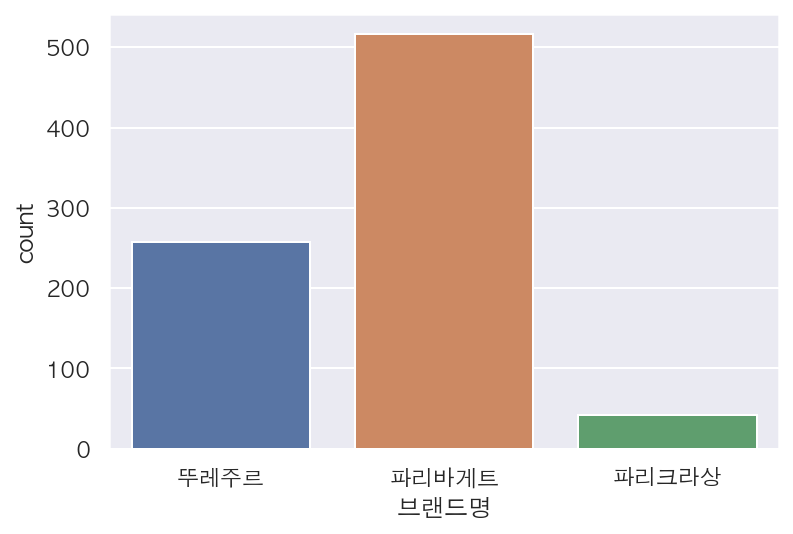

In [272]:
# countplot 으로 브랜드명을 그려봅니다.
sns.countplot(data = df_bread, x = "브랜드명")

<AxesSubplot:xlabel='시군구명', ylabel='count'>

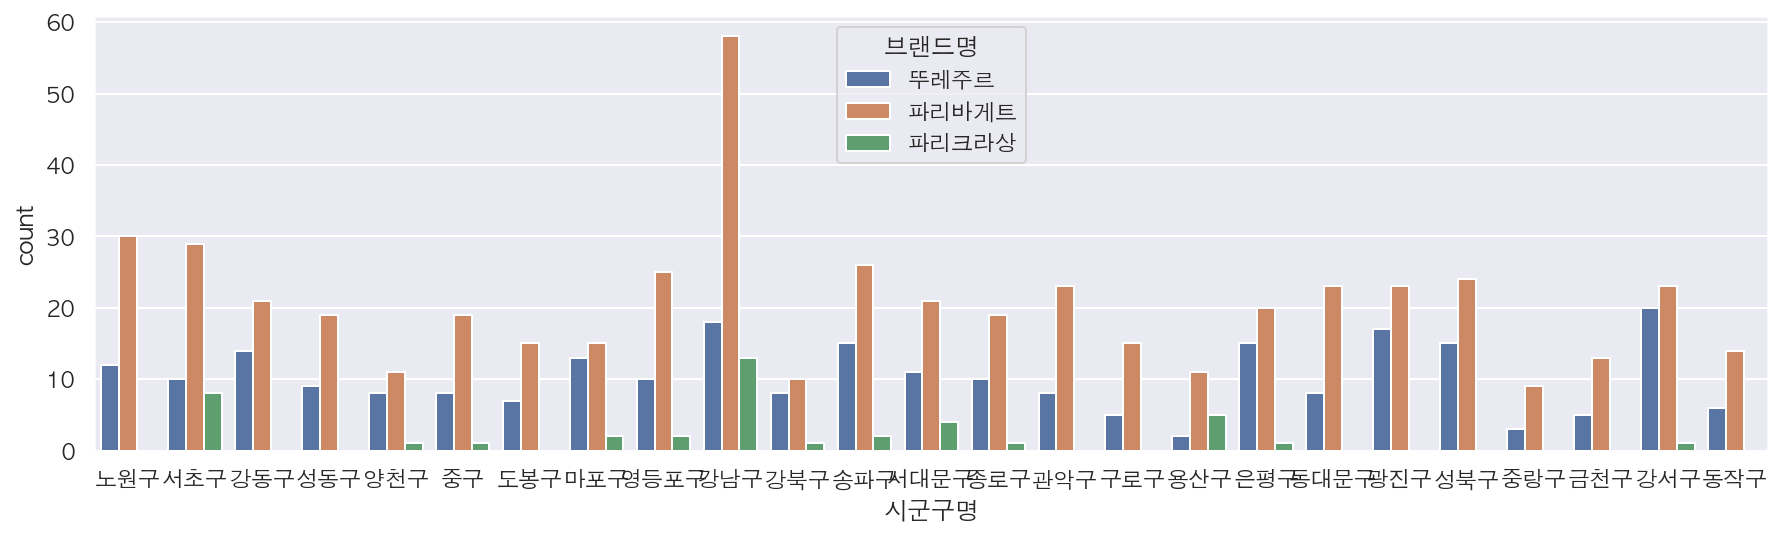

In [274]:
# 시군구별로 브랜드명의 빈도수 차이를 비교합니다.
plt.figure(figsize = (15,4))
sns.countplot(data = df_bread, x = "시군구명", hue = "브랜드명")

<AxesSubplot:xlabel='경도', ylabel='위도'>

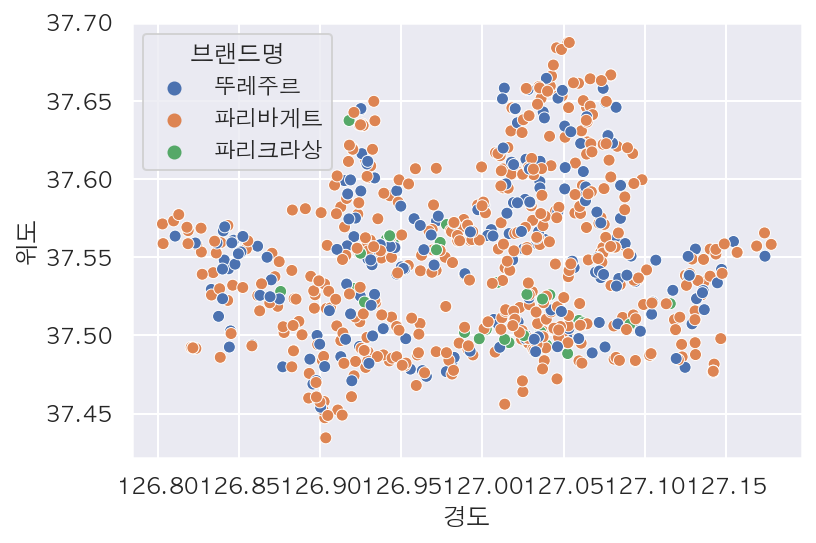

In [275]:
# scatterplot 으로 위경도를 표현해 봅니다.
sns.scatterplot(data = df_bread, x = "경도", y = "위도", hue = "브랜드명")

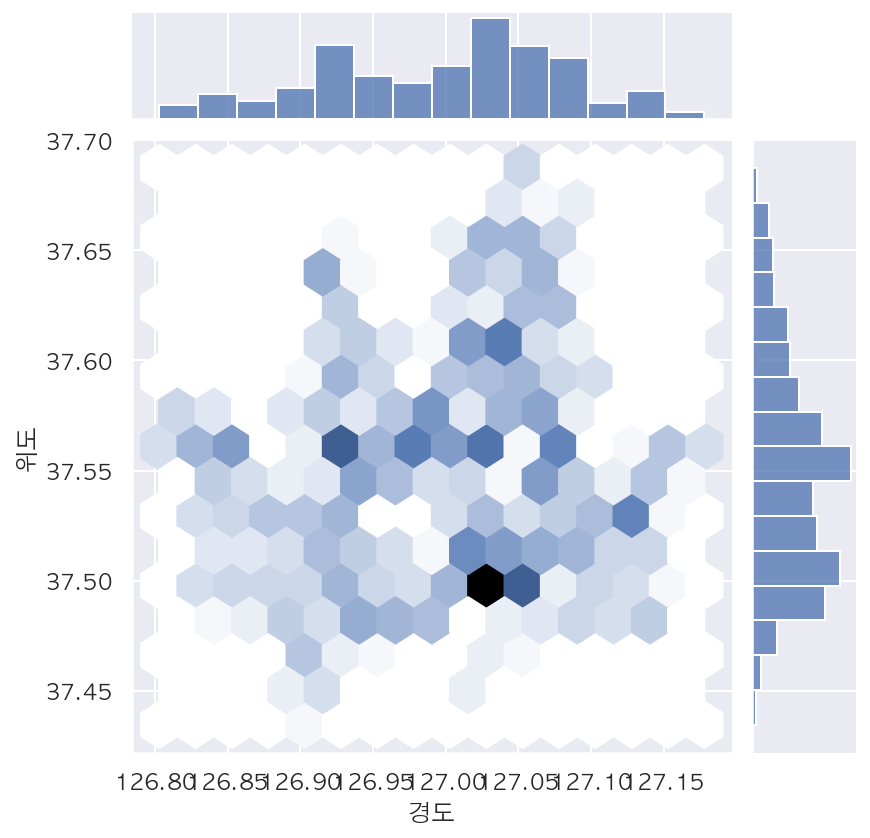

In [276]:
# jointplot 으로 위경도를 표현해 봅니다.
sns.jointplot(data = df_bread, x = "경도", y = "위도", kind = "hex")

## 지도에 표현하기
### Marker 로 위치를 찍어보기

In [277]:
df_bread.loc

Int64Index([  2935,  13843,  14031,  14229,  14246,  14713,  14842,  14889,
             14897,  15019,
            ...
            544366, 544527, 551365, 555475, 556168, 559820, 561538, 561810,
            569327, 569479],
           dtype='int64', length=815)

In [319]:
m2 = folium.Map([lat, long], zoom_start=12, tiles = "stamen Terrain" )

for i in df_bread.index[100:]:
    sub_lat = df_bread.loc[i,"위도"]
    sub_long = df_bread.loc[i,"경도"]
    title = df_bread.loc[i,"상호명"]
    location = df_bread.loc[i,"도로명주소"]
    if df_bread.loc[i,"브랜드명"] == "파리바게트":
        icon_color = "blue"
    elif df_bread.loc[i,"브랜드명"] == "뚜레주르":
        icon_color = "orange"
    else:
        icon_color = "red"
    folium.CircleMarker(
        [sub_lat, sub_long],
        tooltip = title + "-" + location,
        popup = f"<i>{title}<i>",
        radius = 6,
        color = icon_color,
    ).add_to(m2)

m2.save('m2.html')
m2

In [ ]:
# for i in df_bread.index:
#     print(i)

In [ ]:
# icon=folium.Icon(color=icon_color) 로 아이콘 컬러를 변경합니다.


### MarkerCluster 로 표현하기
* https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/MarkerCluster.ipynb

### Heatmap 으로 그리기
https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/Heatmap.ipynb

In [ ]:
# heatmap 예제 이해하기


In [ ]:
# heatmap 예제와 같은 형태로 데이터 2차원 배열 만들기


In [ ]:
# HeatMap 그리기
